In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [102]:
cam = cv2.VideoCapture('videotest.mp4')
  
# frame
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './videoImages/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
        if currentframe == 200:
            break
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../videoImages/frame0.jpg
Creating..../videoImages/frame1.jpg
Creating..../videoImages/frame2.jpg
Creating..../videoImages/frame3.jpg
Creating..../videoImages/frame4.jpg
Creating..../videoImages/frame5.jpg
Creating..../videoImages/frame6.jpg
Creating..../videoImages/frame7.jpg
Creating..../videoImages/frame8.jpg
Creating..../videoImages/frame9.jpg
Creating..../videoImages/frame10.jpg
Creating..../videoImages/frame11.jpg
Creating..../videoImages/frame12.jpg
Creating..../videoImages/frame13.jpg
Creating..../videoImages/frame14.jpg
Creating..../videoImages/frame15.jpg
Creating..../videoImages/frame16.jpg
Creating..../videoImages/frame17.jpg
Creating..../videoImages/frame18.jpg
Creating..../videoImages/frame19.jpg
Creating..../videoImages/frame20.jpg
Creating..../videoImages/frame21.jpg
Creating..../videoImages/frame22.jpg
Creating..../videoImages/frame23.jpg
Creating..../videoImages/frame24.jpg
Creating..../videoImages/frame25.jpg
Creating..../videoImages/frame26.jpg
Creating...

Using cache found in C:\Users\Chinh Dang/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-12 Python-3.9.13 torch-1.8.2+cpu CPU

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 


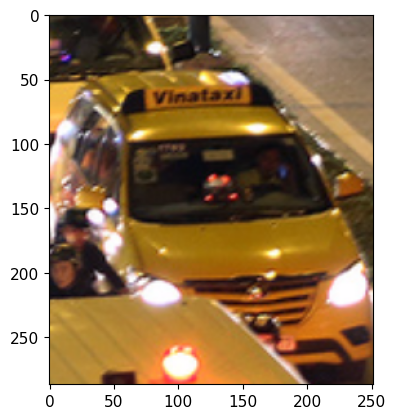

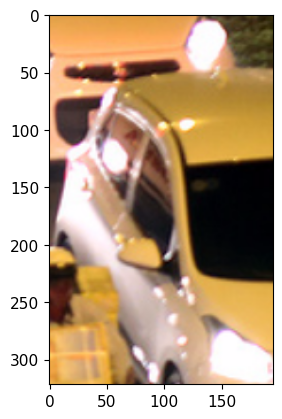

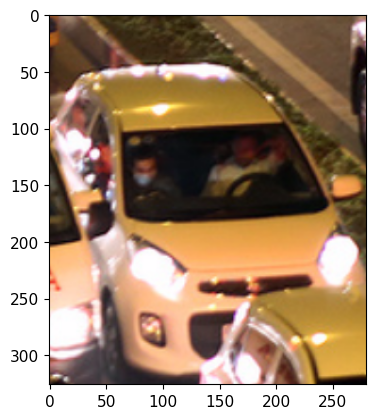

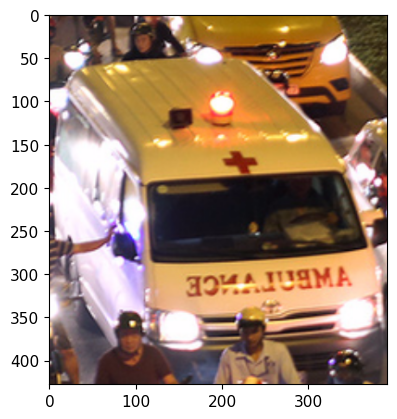

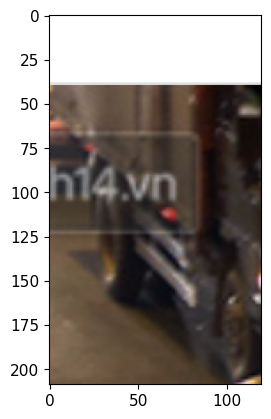

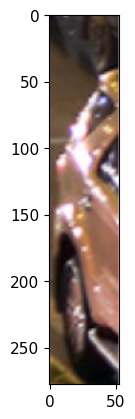

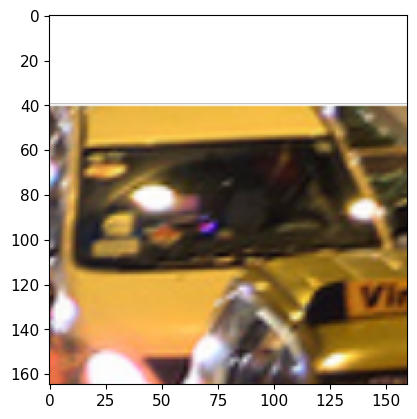

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')
img_name = 't4.PNG'
results = model(img_name)
img = Image.open(img_name)

left = 0
top = 0
right = 0
bottom = 0

res_ar = results.xyxy[0]
truck_list = []

for i in range(len(res_ar)):
    if res_ar[i][5] == 7. or res_ar[i][5] == 5. or res_ar[i][5] == 2.:
        left = int(res_ar[i][0])
        top = int(res_ar[i][1]) - 40
        right = int(res_ar[i][2])
        bottom = int(res_ar[i][3])
        img_res = img.crop((left, top, right, bottom))
        truck_list.append(img_res)

for i in truck_list:
    %matplotlib inline
    plt.imshow(i)
    plt.show()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Chinh Dang/.cache\torch\hub\master.zip
YOLOv5  2023-1-12 Python-3.9.13 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 416 layers, 140028544 parameters, 0 gradients, 208.0 GFLOPs
Adding AutoShape... 
image 1/1: 287x252 (no detections)
Speed: 8.0ms pre-process, 2940.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 576)


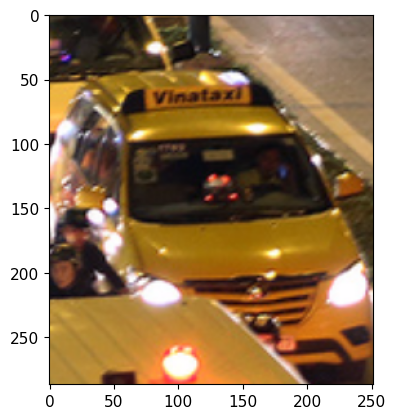

image 1/1: 322x195 1 ambulance long beacon
Speed: 6.0ms pre-process, 2273.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 448)


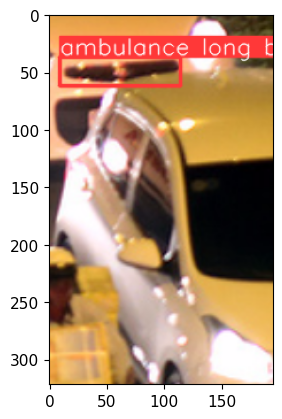

image 1/1: 326x280 (no detections)
Speed: 0.0ms pre-process, 2884.8ms inference, 0.0ms NMS per image at shape (1, 3, 640, 576)


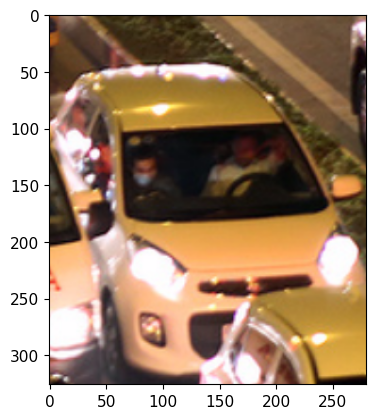

image 1/1: 428x392 1 ambulance small beacon
Speed: 11.5ms pre-process, 3190.1ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


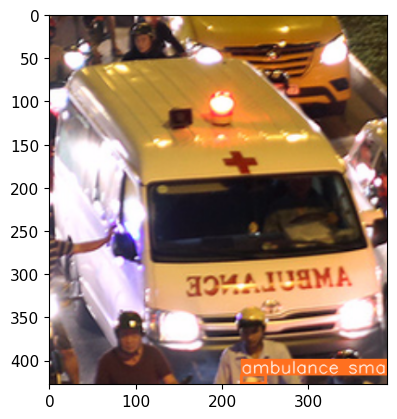

image 1/1: 209x120 (no detections)
Speed: 0.0ms pre-process, 2017.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 384)


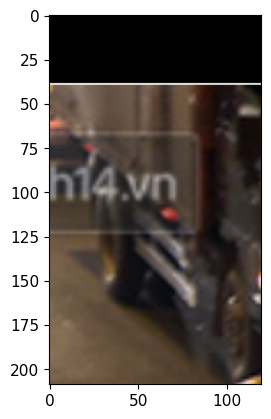

image 1/1: 278x53 (no detections)
Speed: 0.0ms pre-process, 848.2ms inference, 0.0ms NMS per image at shape (1, 3, 640, 128)


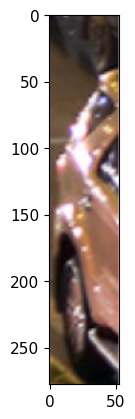

image 1/1: 165x160 (no detections)
Speed: 10.0ms pre-process, 3177.3ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


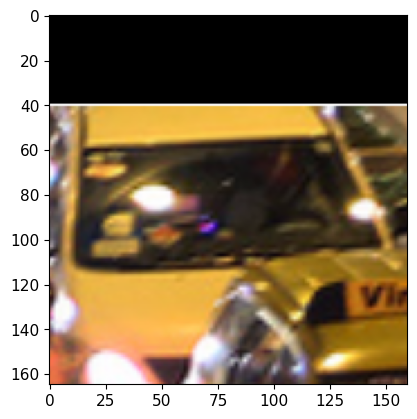

In [9]:
modelcus = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp11/weights/last.pt', force_reload=True)

for v in truck_list:
    result2 = modelcus(v)
    result2.print()
    %matplotlib inline
    plt.imshow(np.squeeze(result2.render()))
    plt.show()

In [91]:
image = cv2.imread('beacon_yes3.PNG')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([image],[1],None,[64],[0, 255])

[minVal, maxVal, minLoc, maxLoc] = cv2.minMaxLoc(gray_image)

thresh = int(maxVal * 0.8)
ret, thresh_img = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)

# cv2.imshow('something', thresh_img)
# cv2.imshow('another', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 6
